# Check `GDS` stack

This notebook checks all software requirements for the course Geographic Data Science are correctly installed. 

A successful run of the notebook implies no errors returned in any cell *and* every cell beyond the first one returning a printout of `True`. This ensures a correct environment installed.

---

In [1]:
import bokeh as bk
float(bk.__version__[:4]) >= 0.12

True

In [2]:
import matplotlib as mpl
float(mpl.__version__[:3]) >= 1.5

True

In [3]:
import mplleaflet as mpll

In [4]:
import seaborn as sns
float(sns.__version__[:3]) >= 0.6

True

---

In [5]:
import qgrid

In [6]:
import pandas as pd
float(pd.__version__[:4]) >= 0.18

True

In [7]:
import sklearn
float(sklearn.__version__[:4]) >= 0.17

True

In [8]:
import statsmodels.api as sm
float(sm.version.version[:3]) >= 0.6

True

In [9]:
import xlrd

In [10]:
import xlsxwriter

---

In [11]:
import fiona
float(fiona.__version__[:3]) >= 1.7

True

In [12]:
import geopandas as gpd
float(gpd.__version__[:3]) >= 0.2

True

In [13]:
import pysal as ps
float(ps.version.version[:4]) >= 1.11

/home/dani/anaconda/envs/gds/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


True

In [14]:
import rasterio as rio

# Test

In [15]:
shp = ps.examples.get_path('columbus.shp')
db = gpd.read_file(shp)
db.head()

,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,...,DISCBD,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO,geometry
0,0.309441,2.440629,2,5,1,5,80.467003,19.531,15.725980,2.850747,...,5.03,38.799999,44.070000,1.0,1.0,1.0,0.0,1000.0,1005.0,"POLYGON ((8.624129295349121 14.23698043823242,..."
1,0.259329,2.236939,3,1,2,1,44.567001,21.232,18.801754,5.296720,...,4.27,35.619999,42.380001,1.0,1.0,0.0,0.0,1000.0,1001.0,"POLYGON ((8.252790451049805 14.23694038391113,..."
2,0.192468,2.187547,4,6,3,6,26.350000,15.956,30.626781,4.534649,...,3.89,39.820000,41.180000,1.0,1.0,1.0,0.0,1000.0,1006.0,"POLYGON ((8.653305053710938 14.00809001922607,..."
3,0.083841,1.427635,5,2,4,2,33.200001,4.477,32.387760,0.394427,...,3.70,36.500000,40.520000,1.0,1.0,0.0,0.0,1000.0,1002.0,"POLYGON ((8.459499359130859 13.82034969329834,..."
4,0.488888,2.997133,6,7,5,7,23.225000,11.252,50.731510,0.405664,...,2.83,40.009998,38.000000,1.0,1.0,1.0,0.0,1000.0,1007.0,"POLYGON ((8.685274124145508 13.63951969146729,..."


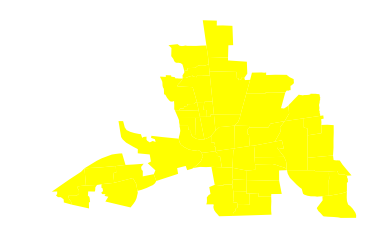

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(1)
db.plot(facecolor='yellow', ax=ax)
ax.set_axis_off()
plt.show()

In [17]:
db.crs['init'] = 'epsg:26918'

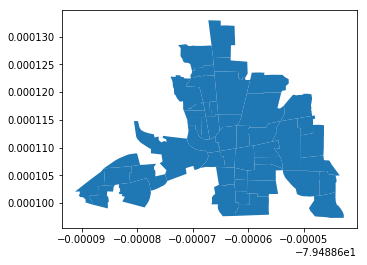

In [18]:
db_wgs84 = db.to_crs(epsg=4326)
db_wgs84.plot()
plt.show()

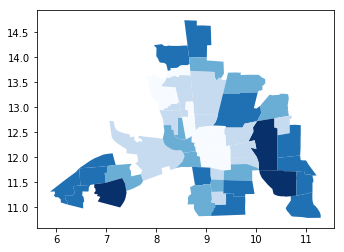

In [19]:
db.plot(column='INC', scheme='fisher_jenks', cmap=plt.matplotlib.cm.Blues)
plt.show()

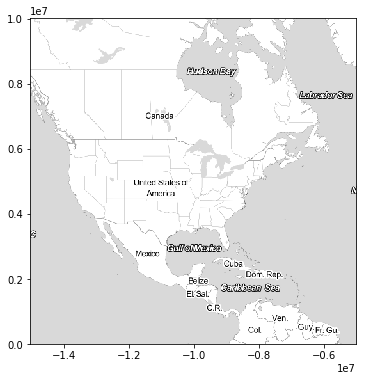

In [20]:
import numpy as np
import contextily as ctx
tl = ctx.tile_providers.ST_TONER_LITE

db = gpd.read_file(ps.examples.get_path('us48.shp'))
db.crs = {'init': 'epsg:4326'}
w, s, e, n = db.to_crs(epsg=3857).total_bounds
dbp = db.to_crs(epsg=3857)
# Download raster
_ = ctx.bounds2raster(w, s, e, n, 'us.tif', url=tl)
# Load up and plot
source = rio.open('us.tif', 'r')
red = source.read(1)
green = source.read(2)
blue = source.read(3)
pix = np.dstack((red, green, blue))
bounds = (source.bounds.left, source.bounds.right, \
          source.bounds.bottom, source.bounds.top)
f = plt.figure(figsize=(6, 6))
ax = plt.imshow(pix, extent=bounds)

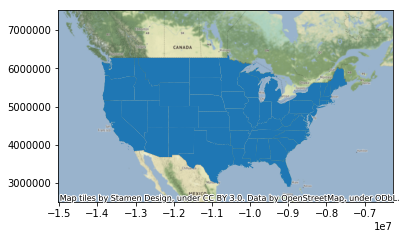

In [21]:
ax = db.to_crs(epsg=3857).plot()
ctx.add_basemap(ax)